## *<center>Analysis of the Deceased in the Titanic</center>*

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install folium
import folium

### Data Manipulation

In [2]:
ruta_archivo = 'C:\\Users\\59892\\Desktop\\Proyectos DC\\Proyecto2\\Simplified Titanic Dataset.csv'
df = pd.read_csv(ruta_archivo)
df.head()


,age_grp,department,embarked,survived
0,40-49,3rd Class,Southampton,False
1,30-39,3rd Class,Southampton,True
2,10-19,3rd Class,Southampton,False
3,10-19,3rd Class,Southampton,False
4,20-29,Victualling,Southampton,False


In [3]:
df['survived'] = df['survived'].replace({False: 0, True: 1})
df_sorted = df.sort_values('survived')
print(df_sorted)

     age_grp  department     embarked  survived
0      40-49   3rd Class  Southampton         0
1400   40-49   1st Class  Southampton         0
1397   20-29        Deck      Belfast         0
1396   20-29   2nd Class  Southampton         0
1395   20-29  A la Carte  Southampton         0
...      ...         ...          ...       ...
1829   30-39   1st Class    Cherbourg         1
1830   20-29   3rd Class  Southampton         1
1534   20-29   1st Class    Cherbourg         1
540      0-9   3rd Class  Southampton         1
1601   20-29   1st Class    Cherbourg         1

[2240 rows x 4 columns]


In [4]:
dt = df['age_grp'].dtype
ud = df['age_grp'].unique()
dp = df['department'].unique()
em = df['embarked'].unique()
print(ud)
print(dp)
print(em)
print(dt)

['40-49' '30-39' '10-19' '20-29' '0-9' '60-69' '50-59' '70-79' nan]
['3rd Class' 'Victualling' '2nd Class' 'Engine' 'A la Carte' '1st Class'
 'Deck']
['Southampton' 'Cherbourg' 'Belfast' 'Queenstown' nan]


In [5]:
df['age_grp'] = df['age_grp'].replace({'40-49': (40+49+1)/2, '30-39': (30+39+1)/2,
                                       '10-19': (10+19+1)/2, '20-29': (20+29+1)/2,
                                       '0-9': (0+9+1)/2, '60-69': (60+69+1)/2, 
                                       '50-59': (50+59+1)/2, '70-79': (70+79+1)/2, 'nan': 0})
print(df)

      age_grp   department     embarked  survived
0        45.0    3rd Class  Southampton         0
1        35.0    3rd Class  Southampton         1
2        15.0    3rd Class  Southampton         0
3        15.0    3rd Class  Southampton         0
4        25.0  Victualling  Southampton         0
...       ...          ...          ...       ...
2235     25.0    3rd Class    Cherbourg         0
2236     25.0    3rd Class    Cherbourg         0
2237     25.0   A la Carte  Southampton         0
2238     25.0   A la Carte  Southampton         0
2239     25.0    3rd Class  Southampton         0

[2240 rows x 4 columns]


----

## *<center>Survivor Percentage by Age</center>*

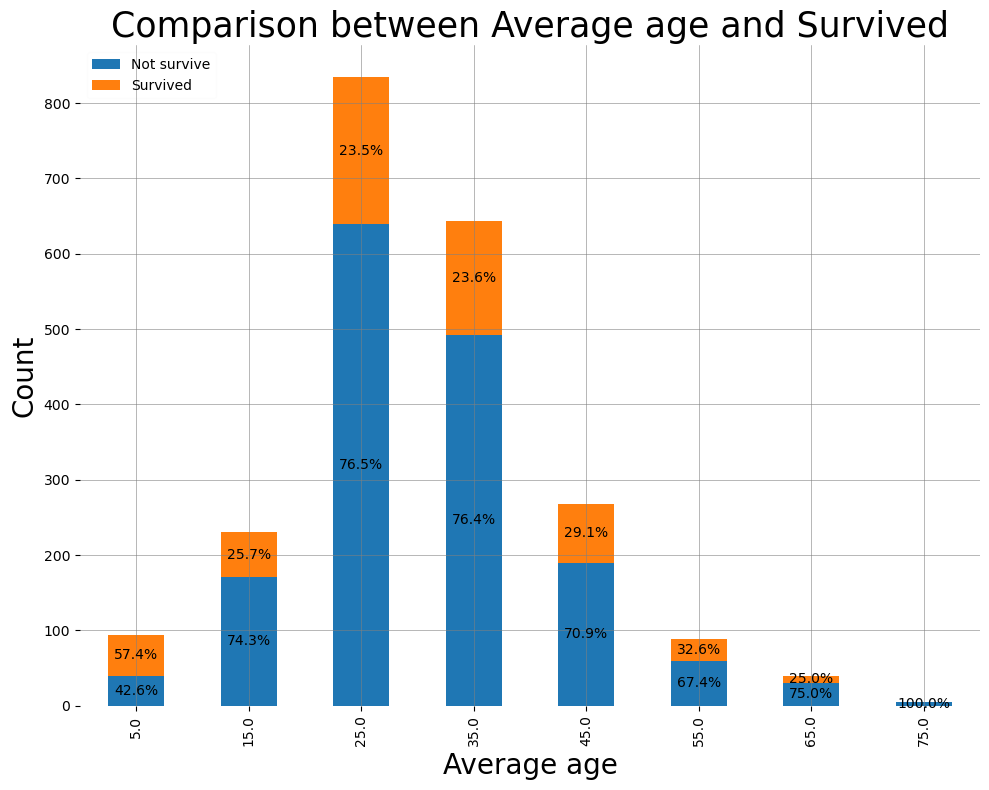

In [6]:
grouped_data = df.groupby(['age_grp', 'survived']).size().unstack()
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
grouped_data.plot(kind='bar', stacked=True, ax=ax)

for i in range(len(grouped_data_percentage)):
    for j in range(len(grouped_data_percentage.columns)):
        percentage = grouped_data_percentage.iloc[i, j] * 100
        ax.annotate(f'{percentage:.1f}%', (i, grouped_data.iloc[i, :j].sum() + grouped_data.iloc[i, j] / 2),
                    ha='center', va='center')


plt.box(False)
plt.title('Comparison between Average age and Survived', fontsize=25, color='black', fontweight='normal')
plt.xlabel('Average age', fontsize=20, color='black', fontweight='normal')
plt.ylabel('Count', fontsize=20, color='black', fontweight='normal')
plt.legend(['Not survive', 'Survived'], loc='upper left', framealpha=0.05,)
plt.xticks(color='black')
plt.yticks(color='black')

plt.grid(axis='y', color='grey', linewidth=0.40)
plt.grid(axis='x', color='grey', linewidth=0.40)

plt.show()


Here we can observe that at the time of the ship's sinking, priority was given to children, as more than half of them survived.
We can also see that the majority of the passengers were in the age range of 20 to 40 years old (having lower survival rates), indicating the migration trend of that era to America.

---

## *<center>Survivor Percentage by Department</center>*

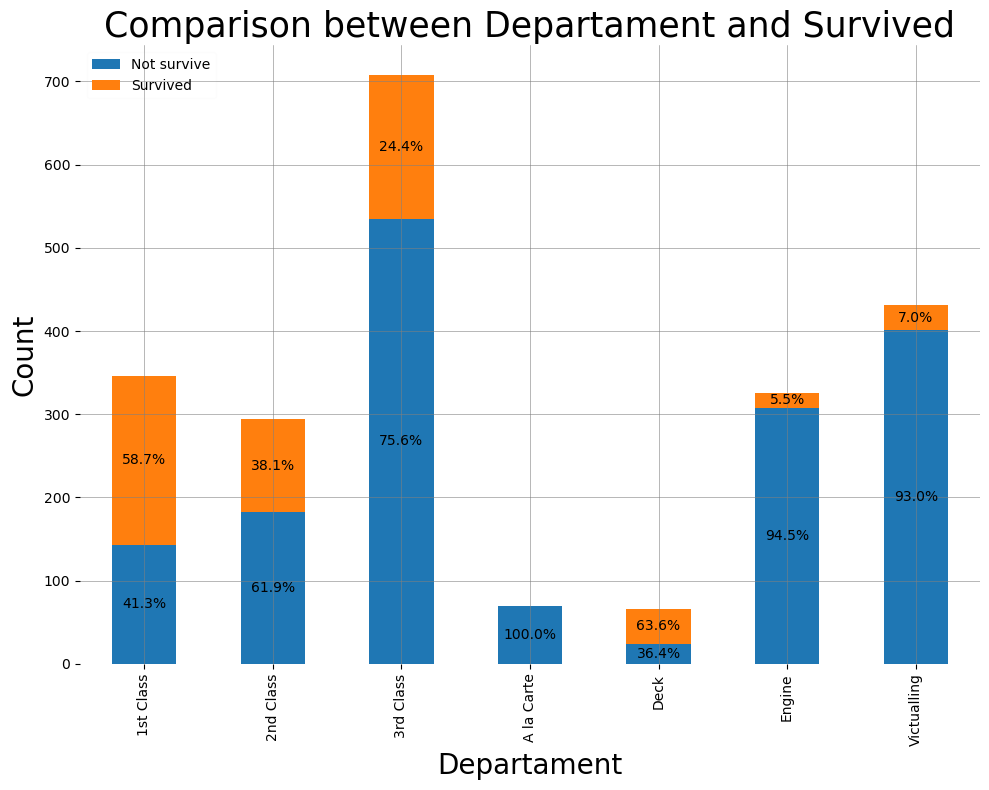

In [7]:
grouped_data = df.groupby(['department', 'survived']).size().unstack()
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
grouped_data.plot(kind='bar', stacked=True, ax=ax)

for i in range(len(grouped_data_percentage)):
    for j in range(len(grouped_data_percentage.columns)):
        percentage = grouped_data_percentage.iloc[i, j] * 100
        ax.annotate(f'{percentage:.1f}%', (i, grouped_data.iloc[i, :j].sum() + grouped_data.iloc[i, j] / 2),
                    ha='center', va='center')

plt.box(False)
plt.title('Comparison between Departament and Survived', fontsize=25, color='black', fontweight='normal')
plt.xlabel('Departament', fontsize=20, color='black', fontweight='normal')
plt.ylabel('Count', fontsize=20, color='black', fontweight='normal')
plt.legend(['Not survive', 'Survived'], loc='upper left', framealpha=0.05,)
plt.xticks(color='black')
plt.yticks(color='black')

plt.grid(axis='y', color='grey', linewidth=0.40)
plt.grid(axis='x', color='grey', linewidth=0.40)

plt.show()

Here we can observe the priority given to the First-class passengers. Despite being almost half the number of Third-class passengers, their survival ratio was more than half, while in Third class, less than a quarter of the total passengers survived.

---

## *<center>Survivor Percentage by Embarkation City</center>*

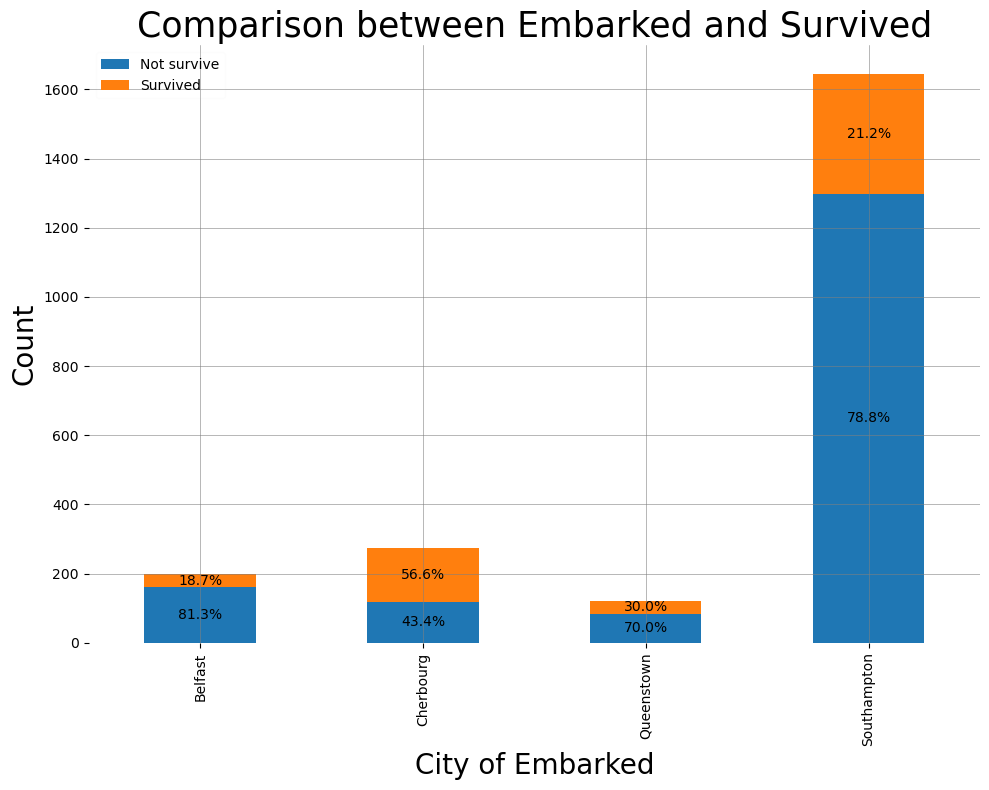

In [8]:
grouped_data = df.groupby(['embarked', 'survived']).size().unstack()
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
grouped_data.plot(kind='bar', stacked=True, ax=ax)

for i in range(len(grouped_data_percentage)):
    for j in range(len(grouped_data_percentage.columns)):
        percentage = grouped_data_percentage.iloc[i, j] * 100
        ax.annotate(f'{percentage:.1f}%', (i, grouped_data.iloc[i, :j].sum() + grouped_data.iloc[i, j] / 2),
                    ha='center', va='center')

plt.box(False)
plt.title('Comparison between Embarked and Survived', fontsize=25, color='black', fontweight='normal')
plt.xlabel('City of Embarked', fontsize=20, color='black', fontweight='normal')
plt.ylabel('Count', fontsize=20, color='black', fontweight='normal')
plt.legend(['Not survive', 'Survived'], loc='upper left', framealpha=0.05,)
plt.xticks(color='black')
plt.yticks(color='black')

plt.grid(axis='y', color='grey', linewidth=0.40)
plt.grid(axis='x', color='grey', linewidth=0.40)

plt.show()

Here we can observe that the vast majority of the passengers had embarked in Southampton, having the second lowest survival rate. On the other hand, those embarked in the French city of Cherbourg have the highest percentage of survivors.

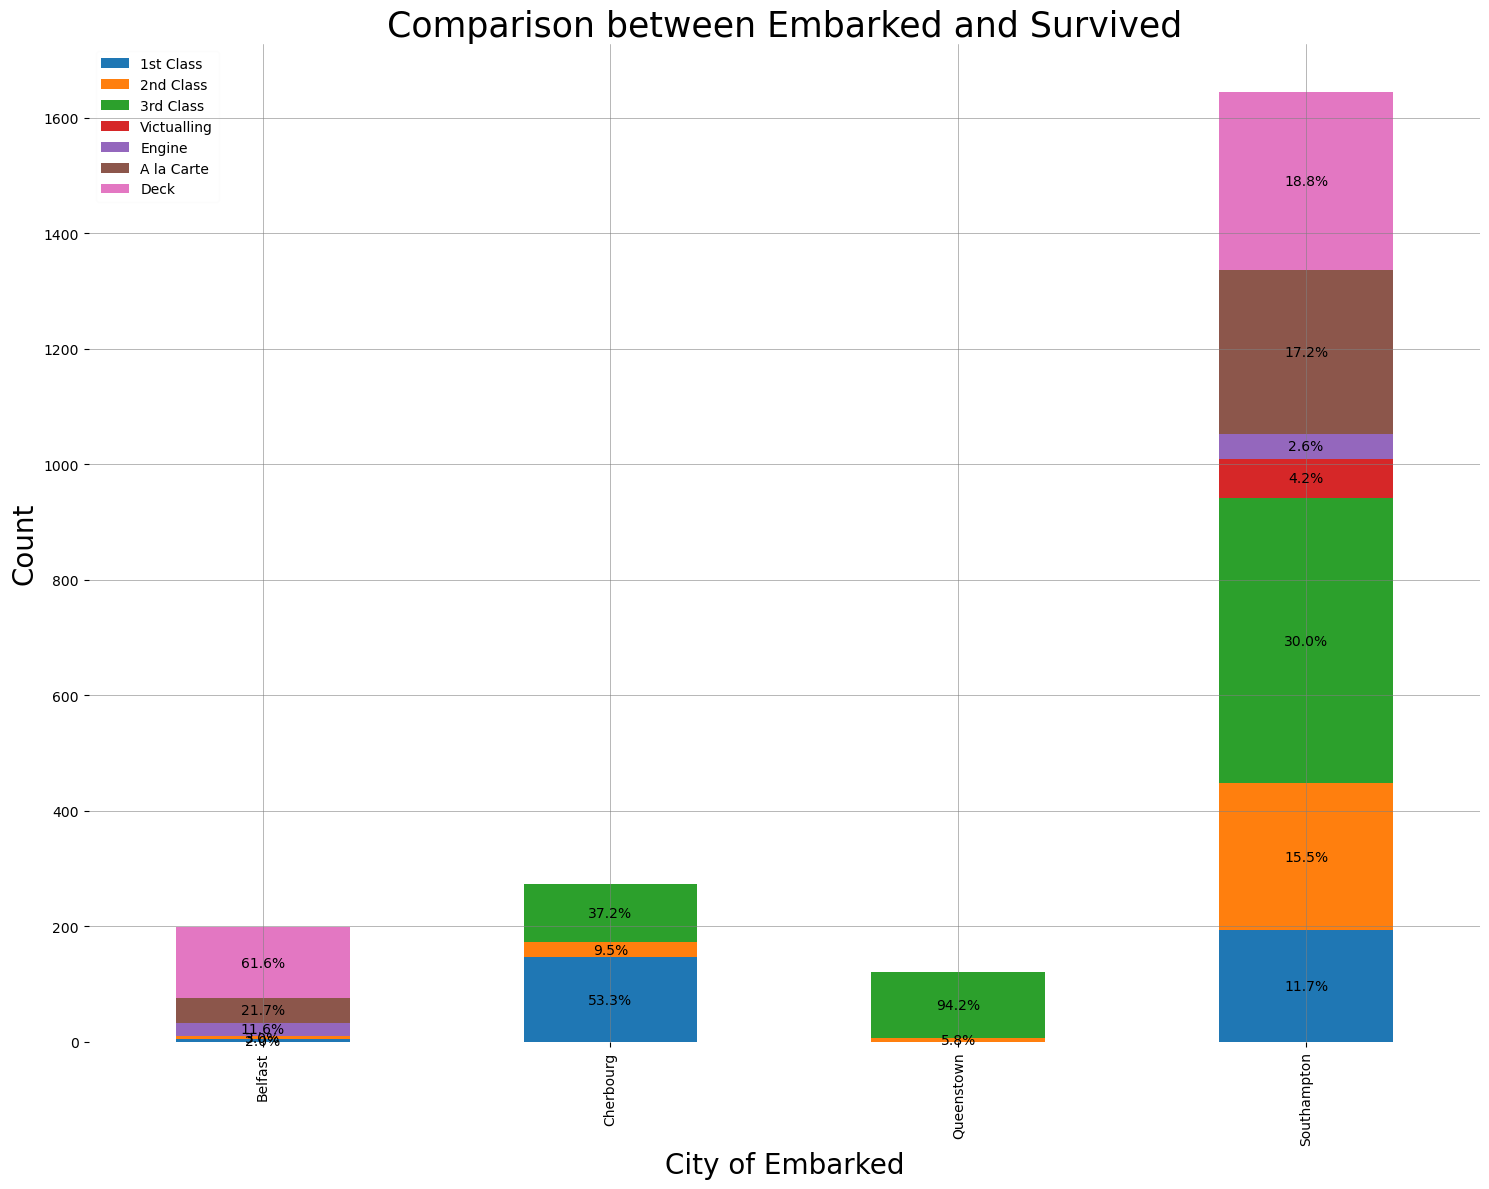

In [18]:
grouped_data = df.groupby(['embarked', 'department']).size().unstack()
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(15, 12), tight_layout=True)
grouped_data.plot(kind='bar', stacked=True, ax=ax)

for i in range(len(grouped_data_percentage)):
    for j in range(len(grouped_data_percentage.columns)):
        percentage = grouped_data_percentage.iloc[i, j] * 100
        ax.annotate(f'{percentage:.1f}%', (i, grouped_data.iloc[i, :j].sum() + grouped_data.iloc[i, j] / 2),
                    ha='center', va='center')

plt.box(False)
plt.title('Comparison between Embarked and Survived', fontsize=25, color='black', fontweight='normal')
plt.xlabel('City of Embarked', fontsize=20, color='black', fontweight='normal')
plt.ylabel('Count', fontsize=20, color='black', fontweight='normal')

# Cambiar la leyenda
labels = ['1st Class', '2nd Class', '3rd Class', 'Victualling', 'Engine', 'A la Carte', 'Deck']
plt.legend(labels, loc='upper left', framealpha=0.05)
plt.xticks(color='black')
plt.yticks(color='black')

plt.grid(axis='y', color='grey', linewidth=0.40)
plt.grid(axis='x', color='grey', linewidth=0.40)

plt.show()


Here we can observe that more than half of the passengers embarked in France belonged to the first class, which statistically explains why that city had such a high percentage of survivors.

---

## *<center>Map using Folium</center>*

In [21]:
data = {
    'City': ['Southampton', 'Cherbourg', 'Belfast', 'Queenstown'],
    'Survivors': [21.2, 56.6, 18.7, 30.0],
    'Latitude': [50.9097, 49.6500, 54.5970, 51.8492],
    'Longitude': [-1.4044, -1.6500, -5.9300, -8.2943]
}

df = pd.DataFrame(data)

map = folium.Map(location=[51.5074, -0.1278], zoom_start=6)

for index, row in df.iterrows():
    city = row['City']
    percentage = row['Survivors']
    latitude = row['Latitude']
    longitude = row['Longitude']
    tooltip = f'{city}: {percentage}% of survivors'
    
    folium.Marker(location=[latitude, longitude], popup=city, tooltip=tooltip).add_to(map)

map
